In [2]:
import pandas as pd
from preprocess import getPopularityIndex
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
X = pd.read_pickle('TwitterData_1e5_90rm.pkl')

(array([1565., 5923., 1670., 3500., 4160.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

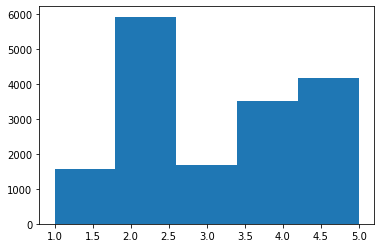

In [4]:
y = getPopularityIndex(X, 4)
plt.hist(y, bins=5)

In [54]:
from preprocess import mostFrequentWords
X = mostFrequentWords(X)

In [55]:
X.to_pickle('TwitterData_1e5_90rm_MFW.pkl')

In [5]:
from preprocess import cleanData
X = cleanData(X)

In [57]:
print(list(X.columns))

['followers_count', 'friends_count', 'listed_count', 'statuses_count', 'mentions_tot_followers', 'mentions_tot_friends', 'mentions_tot_statuses', 'day', 'time', 'n_sentences', 'n_words', 'n_adjectives', 'n_adverbs', 'n_nouns', 'n_pronouns', 'n_verbs', 'n_long_words', 'n_hashtags', 'n_user_mentions', 'has_symbols', 'has_urls', 'has_photo', 'has_video', 'has_gif', 'has_questions', 'is_reply', 'has_us', 'has_like', 'has_thanks', 'has_please', 'has_team', 'has_sorry', 'has_know', 'has_hi', 'has_free', 'has_flavor']


In [ ]:
numerical_columns = ['followers_count', 'friends_count', 'listed_count', 'statuses_count', 'mentions_tot_followers', 'mentions_tot_friends', 'mentions_tot_statuses', 'n_sentences', 'n_words', 'n_adjectives', 'n_adverbs', 'n_nouns', 'n_pronouns', 'n_verbs', 'n_long_words', 'n_hashtags', 'n_user_mentions']

In [6]:
from preprocess import encodePandas, encodeSklearn
X_encodedSl, y_encodedSl, encoder = encodeSklearn(X, y)

In [8]:
X_encodedSl.shape

(16818, 590)

In [58]:
X_encodedPd, y_encodedPd = encodePandas(X, y) 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_encodedPd, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf = RandomForestClassifier(random_state=0, oob_score=True)
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'evening'

In [42]:
y_hat_encodedSl = clf.predict(X_test)

In [43]:
y_hat_encodedSl

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [44]:
y_hat = sum(encoder.inverse_transform(y_hat_encodedSl.tolist()).tolist(), [])
y_test = sum(encoder.inverse_transform(y_test.tolist()).tolist(), [])

In [45]:
len(y_test) == len(y_hat)

True

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat)

0.5086206896551724

In [47]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [49]:
clf.feature_importances_.shape

(599,)